# 不均一分散と人口

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices

figsize = (10, 5)

In [2]:
path = '../../data/processed/df_filtered.xlsx'
df = pd.read_excel(path)

In [3]:
df['std_log_pop_per_islands'] = df.groupby('island_ids')['log_pop'].std().loc[df['island_ids']].values

In [4]:
df['std_log_pop_per_islands']

0       0.299254
1       0.299254
2       0.299254
3       0.299254
4       0.299254
          ...   
1708    0.336109
1709    0.336109
1710    0.336109
1711    0.336109
1712    0.336109
Name: std_log_pop_per_islands, Length: 1713, dtype: float64

<Axes: xlabel='log_pop', ylabel='std_log_pop_per_islands'>

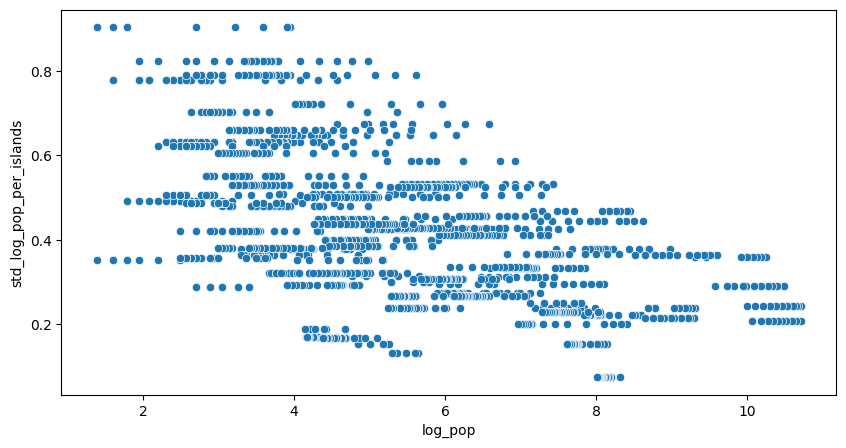

In [7]:
fig, ax = plt.subplots(figsize=figsize)
sns.scatterplot(x ='log_pop', y='std_log_pop_per_islands', data=df, ax=ax)

(array([ 27.,  49.,  55., 152., 114., 185., 140., 146., 173., 111., 173.,
         54.,  38., 108.,  38.,  42.,  27.,  27.,  27.,  27.]),
 array([0.07444167, 0.11593913, 0.15743659, 0.19893405, 0.24043151,
        0.28192897, 0.32342643, 0.36492389, 0.40642135, 0.44791881,
        0.48941627, 0.53091373, 0.57241119, 0.61390865, 0.65540611,
        0.69690357, 0.73840103, 0.77989849, 0.82139595, 0.86289341,
        0.90439087]),
 <BarContainer object of 20 artists>)

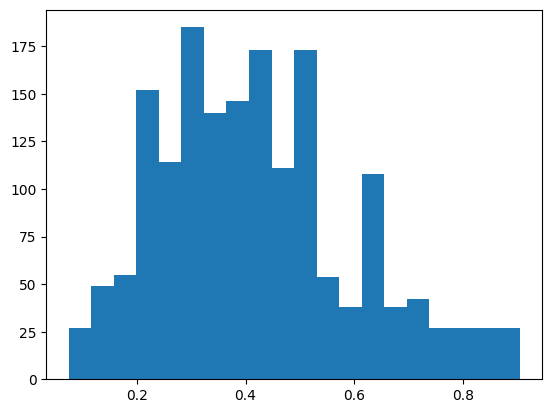

In [9]:
plt.hist(df['std_log_pop_per_islands'], bins=20)

In [16]:
y, X = dmatrices('std_log_pop_per_islands ~ log_pop + after_treatment + area_km2 + I(area_km2**2)', data=df, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())
y_pred = results.predict(X)
residuals = df.std_log_pop_per_islands - y_pred

                               OLS Regression Results                              
Dep. Variable:     std_log_pop_per_islands   R-squared:                       0.379
Model:                                 OLS   Adj. R-squared:                  0.378
Method:                      Least Squares   F-statistic:                     304.5
Date:                     Thu, 09 Jan 2025   Prob (F-statistic):          4.04e-195
Time:                             14:48:29   Log-Likelihood:                 890.25
No. Observations:                     1615   AIC:                            -1770.
Df Residuals:                         1610   BIC:                            -1744.
Df Model:                                4                                         
Covariance Type:                       HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

Text(0, 0.5, 'Standard deviation of log population of stars per island')

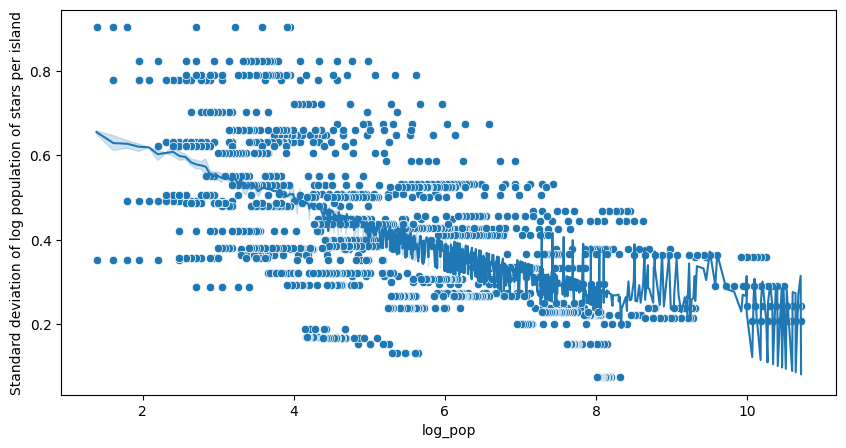

In [18]:
fig, ax = plt.subplots(figsize=figsize)
sns.scatterplot(x ='log_pop', y='std_log_pop_per_islands', data=df, ax=ax)
sns.lineplot(x='log_pop', y=y_pred, data=df, ax=ax)
ax.set_ylabel('Standard deviation of log population of stars per island')

Text(0, 0.5, 'Standard deviation of log population of stars per island')

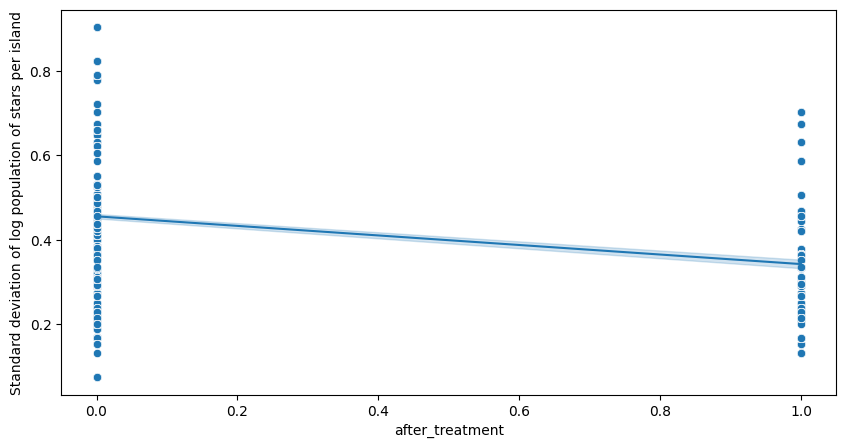

In [12]:
fig, ax = plt.subplots(figsize=figsize)
sns.scatterplot(x ='after_treatment', y='std_log_pop_per_islands', data=df, ax=ax)
sns.lineplot(x='after_treatment', y=y_pred, data=df, ax=ax)
ax.set_ylabel('Standard deviation of log population of stars per island')

Text(0, 0.5, 'Standard deviation of log population of stars per island')

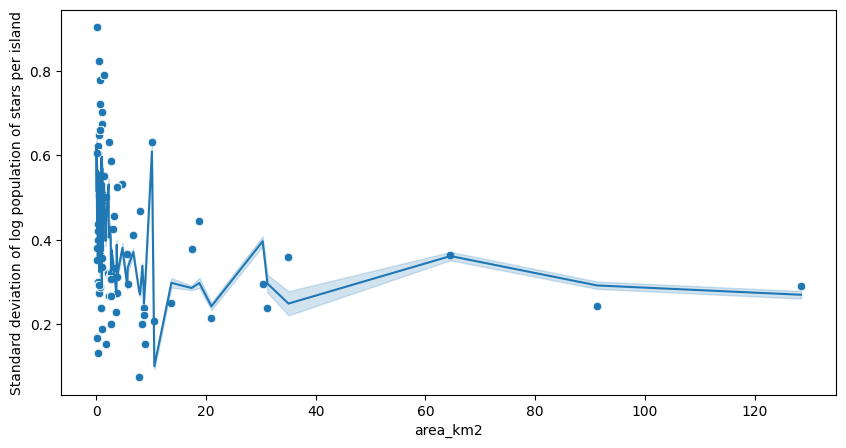

In [17]:
fig, ax = plt.subplots(figsize=figsize)
sns.scatterplot(x ='area_km2', y='std_log_pop_per_islands', data=df, ax=ax)
sns.lineplot(x='area_km2', y=y_pred, data=df, ax=ax)
ax.set_ylabel('Standard deviation of log population of stars per island')

被説明変数が対数人口であり、誤差分散が人口の大きさに依存する場合、誤差分散を人口の関数としてモデル化することができます。以下に、その場合の数式を示します。

モデルの数式
被説明変数 $\log(Y_{it})$ が対数人口であり、誤差分散が人口 $Y_{it}$ に依存する場合、次のようなモデルを考えることができます。

$$ \log(Y_{it}) = \alpha + X_{it}\beta + \epsilon_{it} $$

ここで、誤差項 $\epsilon_{it}$ は次のようにモデル化されます：

$$ \epsilon_{it} \sim N(0, \sigma_{it}^2) $$

誤差分散 $\sigma_{it}^2$ は人口 $Y_{it}$ の関数として次のように表されます：

$$ \sigma_{it}^2 = \sigma^2 \cdot f(Y_{it}) $$

ここで、$f(Y_{it})$ は人口 $Y_{it}$ に依存する関数です。例えば、人口に比例する場合は次のように表されます：

$$ \sigma_{it}^2 = \sigma^2 \cdot Y_{it} $$